Olá, Reinner!

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

# Importar as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils import shuffle
import seaborn as sns


# Carregamento e análise dos Dados

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


Vamos precisar tratar a coluna `Tenure`, pois a mesma tem valores nulos

Avaliando os dados estatísticos:

In [4]:
print(data.describe())

         RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9091.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     4.997690   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.894723   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     2.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.00000

In [5]:
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Temos três características categóricas. A característica `Surname` pode ser removida, pois não influencia no modelo. Temos a característica `Geography`, que precisamos avaliar a quantidade de valores únicos para determinar a tratativa e também temos a característica `Gender` que pode ser convertida para 0 e 1

Analisando a característica Geography

In [6]:
print(data['Geography'].unique())

['France' 'Spain' 'Germany']


Devido a termos somente 3 valores na categoria podemos utilizar o método OHE, não criando muitas colunas e utilizando muita alocação de memória

## Pré-Processamento

In [7]:
#Removendo a coluna Surname
data = data.drop('Surname', axis=1)

In [8]:
#para não cair na armadilha dos dummies iremos remover a primeira coluna
data_ohe = pd.get_dummies(data, drop_first=True)
print(data_ohe)

      RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42     2.0       0.00   
1             2    15647311          608   41     1.0   83807.86   
2             3    15619304          502   42     8.0  159660.80   
3             4    15701354          699   39     1.0       0.00   
4             5    15737888          850   43     2.0  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39     5.0       0.00   
9996       9997    15569892          516   35    10.0   57369.61   
9997       9998    15584532          709   36     7.0       0.00   
9998       9999    15682355          772   42     3.0   75075.31   
9999      10000    15628319          792   28     NaN  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                 1          1               1        101348.88       1   
1                 1          0   

Tratando a coluna `Tenure`. 
  Como na coluna não temos outiliers (média = mediana) podemos considerar os valores nulos como a média

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Análise correta. Porém, a questão geográfica pode influenciar.
</div>


## Divisão de `features` e `target`

In [9]:
#Criando as features e tarfet
features = data_ohe.drop('Exited', axis=1)
target = data_ohe['Exited']

In [10]:
#Dividindo em dados de treinamento e validação.
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)


In [11]:
#Para substituir os valores nulos pela média vamos utilizar SimpleImputer
imputer = SimpleImputer(strategy='mean')
features_train = imputer.fit_transform(features_train)
features_valid = imputer.fit_transform(features_valid)


## Escalabilidade das Características

In [12]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Ajustou no train e aplicou no valid 
</div>


# Equilíbrio entre Classes

Avaliar equilíbrio da classe objetivo

In [13]:
class_frequency = data['Exited'].value_counts(normalize=True)
print(class_frequency)

0    0.7963
1    0.2037
Name: Exited, dtype: float64


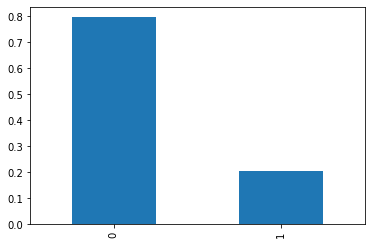

In [14]:
class_frequency.plot(kind='bar');

Temos um desbalanço entre as classes de 0 e 1

# Treinar o modelo (sem corrigir desbalanceamento entre classes)

Temos um problema categórico. Determinar se um clinte sai ou não. Por isso não usaremos Regressão Linear
  Iremos comparar os 3 modelos (árvore de decisão, floresta aleatória e Regressão Logistica) utilizando a métrica F1.

## Árvore de Decisão

In [15]:
def decision_tree(features_train, target_train, features_valid, target_valid, f1, weight=None):
    d1 = [] #salvar profundidades
    f1_acc = [] #salvar os valores de F1
    result1 = 0
    depth = 1
    while result1 < f1 and depth < 20:
        d1.append(depth)
        model1 = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight=weight)
        model1.fit(features_train, target_train)
        predicted_valid1 = model1.predict(features_valid)
        result1 = f1_score(target_valid, predicted_valid1)
        f1_acc.append(result1)
        depth +=1
        if result1 > f1:
            break

    if result1 > f1:
        print(f"F1 = {result1} e máxima profundidade = {depth}")
    else:
        f1_max = max(f1_acc)
        depth = d1[f1_acc.index(f1_max)]
        print(f"Não chegamos no valor F1 desejado.O valor de f1 foi de {f1_max} com a profundidade {depth}")
    return model1, d1, f1_acc
model1, d1, f1_acc = decision_tree(features_train, target_train, features_valid, target_valid, 0.59)
    
    
    

Não chegamos no valor F1 desejado.O valor de f1 foi de 0.5678449258836944 com a profundidade 5


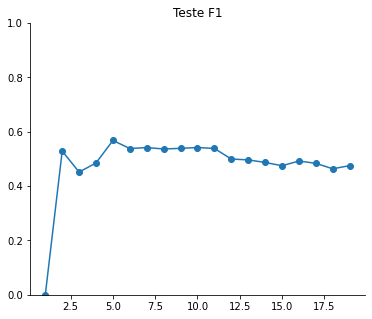

In [16]:
def plot_decision_tree(d1,f1_acc):
    fig = plt.figure(figsize=(6,5))
    plt.plot(d1,f1_acc,"-o")
    plt.title("Teste F1")
    plt.ylim([0.0, 1.0])
    sns.despine()
plot_decision_tree(d1, f1_acc)

Aqui podemos observar que após a profundidade 5 o valor de F1 vai caindo e não atinge o valor mínimo estipulado de 0.59. Logo este modelo deve ser descartado

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


## Floresta Aleatória

In [17]:
def random_forest(features_train, target_train, features_valid, target_valid, f1, weight=None):
    result2 = 0
    f1_acc2=[]
    for estimators in range(20, 50, 10):
        for depth in range (1,16):
            model2 = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=estimators, class_weight=weight)
            model2.fit(features_train, target_train)
            predicted_valid2 = model2.predict(features_valid)
            result2 = f1_score(target_valid, predicted_valid2)
            f1_acc2.append(result2)
            if result2 > f1:
                break
        if result2 > f1:
            break


    f1_max2 = max(f1_acc2)
    if result2 > f1:
        print(f"O valor de F1 é {result2} para n_estimators = {estimators} e max_depth = {depth} ")
    
    else:
        print(f"Não deu certo e o valor máximo de F1 foi {f1_max2}")
    return model2
model2 = random_forest(features_train, target_train, features_valid, target_valid, 0.59)
                

Não deu certo e o valor máximo de F1 foi 0.5627283800243605


Também não conseguimos chegar no nosso objetivo com o modelo de Floresta Aleatória

## Regressão Logística


In [18]:
def logistic_regression(features_train, target_train, features_valid, target_valid, f1, weight=None):
    model3 = LogisticRegression(random_state=12345, solver='liblinear', class_weight=weight)
    model3.fit(features_train, target_train)
    predicted_valid3 = model3.predict(features_valid)
    result3 = f1_score(target_valid, predicted_valid3)
    if result3 > f1:
        print(f"O modelo atingiu o objetivo e o valor de F1 foi de {result3}")
    else:
        print(f"O modelo não atingiu o objetivo e o valor de F1 foi de {result3}") 
    return model3
model3 = logistic_regression(features_train, target_train, features_valid, target_valid, 0.59)
    

O modelo não atingiu o objetivo e o valor de F1 foi de 0.301521438450899


## Descobertas

Com a classe desequilibrada nenhum dos 3 modelos conseguiu atingir a meta de F1 = 0.59. Vamos balancear a classe.

# Balanceamento das Classes do objetivo

## Ajuste de ponderação

### Árvore de Decisão

In [19]:
%%time
model4, d1, f1_acc = decision_tree(features_train, target_train, features_valid, target_valid, 0.59, 'balanced')


F1 = 0.6008097165991902 e máxima profundidade = 6
CPU times: user 158 ms, sys: 56.3 ms, total: 214 ms
Wall time: 239 ms


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Eu gosto muito desta estratégia
</div>


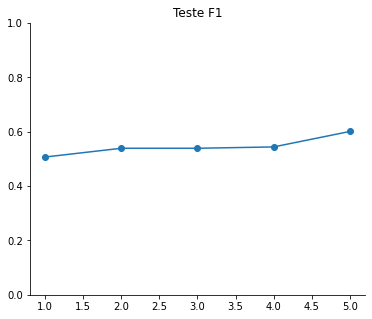

In [20]:
plot_decision_tree(d1, f1_acc)

### Floresta Aleatória

In [21]:
%%time
model5 = random_forest(features_train, target_train, features_valid, target_valid, 0.59, 'balanced')

O valor de F1 é 0.609387430389817 para n_estimators = 20 e max_depth = 5 
CPU times: user 532 ms, sys: 3.94 ms, total: 536 ms
Wall time: 542 ms


### Regressão Logística

In [22]:
model6 = logistic_regression(features_train, target_train, features_valid, target_valid, 0.59, 'balanced')

O modelo não atingiu o objetivo e o valor de F1 foi de 0.509090909090909


### Considerações
Para este método de balanceamento de classe temos as seguintes observações:
- O modelo de Árvore de Decisão e Floresta Aleatória tiveram êxito em alcançar o objetivo.
- O único modelo que não atendeu, mas teve melhora foi o de Regressão Logística. Com incremento de `69%`
- O modelo com o melhor valor de F1 foi o de Floresta Aleatória com `0.609.
- Como a diferença entre o modelo de Floresta Aleatória e Árvore de Decisão foi de apenas `0.009` (1.5% acima) e tem um tempo 4x maior escolho o modelo de Árvore de Decisão

## Superamostragem (Random Oversampling)

Vamos seguir a seguinte sequência:
- Dividir o conjunto de dados de treinamento em observações negativas e positivas;
- Duplicar as observações que têm ocorrências raras (neste caso as de valor "1", Positivas);
- Criar uma nova amostra de treinamento com base nos dados obtidos;
- Embaralhar os dados

In [23]:
#Criar a função upsample, para realizar as etapas
def upsample(features, target, repeat): #repeat = quantidade de vezes que irei duplicar as ocorrências raras
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    features_ones_repeated = np.repeat(features_ones, repeat, axis=0) #repetir 10x a classe mais rara
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = np.concatenate((features_zeros,features_ones_repeated), axis=0)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)


### Árvore de Decisão

In [24]:
model7, d1, f1_acc = decision_tree(features_upsampled, target_upsampled, features_valid, target_valid, 0.59)

Não chegamos no valor F1 desejado.O valor de f1 foi de 0.5189466923570969 com a profundidade 11


### Floresta Aleatória

In [25]:
%%time
model8 = random_forest(features_upsampled, target_upsampled, features_valid, target_valid, 0.59)

O valor de F1 é 0.5927051671732523 para n_estimators = 20 e max_depth = 13 
CPU times: user 4.68 s, sys: 0 ns, total: 4.68 s
Wall time: 4.69 s


### Regressão Logística

In [26]:
model9 = logistic_regression(features_upsampled, target_upsampled, features_valid, target_valid, 0.59)

O modelo não atingiu o objetivo e o valor de F1 foi de 0.4299474605954466


### Considerações

- Utilziando o método de balanceamento de superamostragem somente o modelo de Floresta Aleatória atingiu o objetivo de F1.
- O tempo utilizado pelo modelo de Floresta Aleatória foi 8.3x maior que o mesmo modelo utilizando o método de peso da classe

# Avaliando AUC-ROC

Vamos avaliar a AUC-ROC para o modelo de `Árvore de Decisão` utilizando o método de `peso da classe` (`modelo 4`) e o de `Floresta Aleatória` utilizando o método de `superamostragem` (`modelo 8`)

## AUC-ROC para Árvore de Decisão (`modelo 4`)

In [27]:
#calculando a probabilidade da classe positiva (1)
probabilities_valid4 = model4.predict_proba(features_valid)
probabilities_one_valid4 = probabilities_valid4[:, 1]

#calculando AUC-ROC

auc_roc4 = roc_auc_score(target_valid, probabilities_one_valid4)
print(f'O valor de AUC-ROC é:{auc_roc4}')

O valor de AUC-ROC é:0.8455889277306128


## AUC-ROC para Floresta Aleatória (`modelo 8`)

In [28]:
#calculando a probabilidade da classe positiva (1)
probabilities_valid8 = model8.predict_proba(features_valid)
probabilities_one_valid8 = probabilities_valid8[:, 1]

#calculando AUC-ROC

auc_roc8 = roc_auc_score(target_valid, probabilities_one_valid8)
print(f'O valor de AUC-ROC é:{auc_roc8}')

O valor de AUC-ROC é:0.8380385722099356


# Considerações Finais

- Sem equilíbrio entre as classes do obejtivo não foi possível atingir o valor mínimo de F1.
- Utilizamos 2 métodos de balanceamento entre as classes: `Ajuste de Ponderação`e `Superamostragem`
- O método de balanceamento `Ajuste de Ponderação`foi mais eficaz. Com ele todos os modelos (Árvore de Decisão, Floresta Aleatória e Regressão Logística) atingiram o objetivo de F1 
- No método de `Superamostragem` somente o modelo de Floresta Aleatória atingiu o objetivo de F1
- Comparando os resultados dos melhores modelos de cada método de balancemanto o modelo de `Árvore de Decisão (modelo 4)` do método de `Ajuste de ponderação` obteve o melhor resultado para F1, AUC-ROC e tempo de execução.
- O `modelo 4`foi o melhor modelo.


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. No geral, você respondeu corretamente as questões.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente
- Criação de funções para reúso
- Análise e conclusões corretas

Teu projeto está maduro. Parabéns. Simples, objetivo, preciso.

Desejo sucesso na jornada. Dica: o que você acha de começar a escrever os projetos em inglês para montar portfólio em inglês?
</div>
